<a href="https://colab.research.google.com/github/angeruzzi/DataAnalysis_ProducaoGraosBrasil/blob/main/AnaliseDados_ProducaoGraosBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise da Produção de Grãos no Brasil**
---------------------------------
**Autor**: [Alessandro S. Angeruzzi](https://www.linkedin.com/in/alessandroangeruzzi/)

#**Sumário**

1. [Introdução](#intro)
2. [Processamento e Tratamento dos Dados](#process)
    *	[Bibliotecas](#bibliotecas)
    *	[Importação das fontes de Dados](#dfontes)
    *	[Tratamento dos Dados Pluviométricos](#dpluvi)
    *	[Dados Nacionais](#dnacional)
    *	[Dados de Financiamento Agrícola](#dfinan)
    *	[Dados por Estado](#duf)
		*	[MT](#dufmt)
		*	[PR](#dufpr)
		*	[GO](#dufgo)
		*	[RS](#dufrs)
3. [Análises](#analises)
    *	[Nacional](#annac)
		*	[Produção](#annacpro)
		*	[Área plantada](#annacarea)
		*	[Produtividade](#annacprodut)
		*	[Comparativo dos Dados](#annaccomp)
		*	[Financiamento Agrícola](#annacfinan)
    *	[Por Estado](#anuf)
		*	[MT](#anufmt)
		*	[PR](#anufpr)
		*	[GO](#anufgo)
		*	[RS](#anufrs)
4. [Conclusão](#conclusao)
5. [Fontes](#Fontes)




#**1 - Introdução** <a name="intro"></a>

Não há dúvidas que o Brasil é uma potência agrícola e uma das principais forças está na produção de grãos; em 2020 produziu 239 milhões e exportou 123 milhões de toneladas (arroz, cevada, soja, milho e trigo), se tornando o quarto maior produtor, atrás apenas da China, dos Estados Unidos e da Índia, sendo responsável por 7,8% da produção mundial, alcançando a posição de segundo maior exportador do mundo, com 19% do mercado internacional, contribuindo de maneira significativa para a balança comercial do país.
Mas como foi o caminho para o Brasil chegar aqui? A seguir faço uma breve análise dos dados históricos de produção de grãos do país de 1976 a 2019.

> Nota:
Esta análise tem caracter educacional e principalmente para treinamento em técnicas de análise de dados e uso de bibliotecas Python (Pandas, Numpy e Matplotlib) para manipulação e visualização de dados.
 

#**2 - Processamento e Tratamento dos Dados** <a name="process"></a>



##**Bibliotecas** <a name="bibliotecas"></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##**Importação das fontes de Dados** <a name="dfontes"></a>

In [ ]:
url_prod  = 'https://raw.githubusercontent.com/angeruzzi/Datasource/main/Agro_ProdGraosBrasil/producaoGraos.csv'
url_area  = 'https://raw.githubusercontent.com/angeruzzi/Datasource/main/Agro_ProdGraosBrasil/areaPlantioGraos.csv'
url_finan = 'https://raw.githubusercontent.com/angeruzzi/Datasource/main/Agro_ProdGraosBrasil/financiamentoAgro.csv'
url_ipca  = 'https://raw.githubusercontent.com/angeruzzi/Datasource/main/Agro_ProdGraosBrasil/correcaoIPCA.csv'
url_pluvi = 'https://raw.githubusercontent.com/angeruzzi/Datasource/main/Agro_ProdGraosBrasil/pluviometriaUF.csv'

df_prod  = pd.read_csv(url_prod, sep=";")
df_area  = pd.read_csv(url_area, sep=";")
df_finan = pd.read_csv(url_finan, sep=";")
df_ipca  = pd.read_csv(url_ipca, sep=";")
df_pluvi = pd.read_csv(url_pluvi, sep=";")

In [ ]:
#Lista dos estados
colUF = list(df_prod.columns.values.tolist())[1:]

##**Tratamento dos Dados Pluviométricos** <a name="dpluvi"></a>

In [ ]:
df_pluvi.head()

,ANO,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,1970,1974.751667,872.1,2749.015861,2232.733333,1158.237597,679.112222,1644.95,1053.850,1450.808333,1299.966667,1137.416491,1430.800000,1335.546667,2172.788333,1184.635000,822.208889,721.000,1613.902321,1180.815931,513.866667,1947.2,1231.95,1497.644574,1473.460152,801.566667,1483.878997,1340.600000
1,1971,1922.765000,NaN,3127.378571,1983.266667,NaN,941.800000,1833.90,1331.550,1463.770000,1826.125000,1265.559794,1573.576667,1480.466667,2207.115117,277.800000,765.066071,1252.775,1644.089341,1580.503569,1544.300000,1439.5,NaN,1390.372384,1659.415568,NaN,1371.106830,1397.900000
2,1972,2044.265000,NaN,2844.758701,2016.733333,NaN,93.000000,1350.20,973.675,1626.400000,1467.250000,1324.769287,1749.033333,1765.514286,2216.988422,NaN,1051.700000,NaN,1907.615751,1436.975674,NaN,2674.0,152.50,2119.581594,1873.910897,NaN,1611.193764,1373.150000
3,1973,2100.766667,NaN,2952.473366,2489.333333,997.063736,1193.977273,1407.80,1113.050,1486.580000,1878.501667,1338.939434,1488.376667,1589.823810,2495.159191,1307.926667,894.980909,1150.700,1727.002015,1482.232375,959.708333,2462.2,537.30,1834.707797,1860.868214,1328.100000,1531.112760,1619.666667
4,1974,2029.366667,492.9,2878.937459,2810.783333,1301.821429,1425.367576,1291.00,1115.250,1429.736667,2208.550000,1161.094420,1490.610119,1659.785714,2647.369812,1480.525000,1207.786667,1663.180,1528.070330,1136.589047,1348.233333,2784.7,1760.70,1333.340065,1485.229194,2004.600000,1432.704341,1624.700000


In [ ]:
#Preenchendo os períodos sem medição pela média em cada estado
for uf in colUF:
  media = np.mean(df_pluvi[uf])
  df_pluvi.loc[df_pluvi[uf].isnull(),uf] = media

#restringindo os dados de pluviometria aos anos de 1976 a 2019 para ficar equivalente ao período dos dados de produção disponíveis
df_pluvi = df_pluvi.loc[6:49,:]
df_pluvi.reset_index(inplace=True, drop=True) #Resetando o índice para o novo intervalo
df_pluvi.head()

,ANO,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO
0,1976,2011.000000,2030.200000,2744.654035,2038.566667,910.164286,806.616667,1503.1,1770.390000,1635.260714,1283.945811,1317.066088,1676.423611,1515.850000,1928.197141,904.790000,784.784444,797.146389,1729.994506,1510.594714,683.950000,2073.2,2134.20,1562.975256,1680.722868,1068.600000,1958.977501,1510.725
1,1977,2283.566667,1860.066667,2800.051281,2600.400000,1171.633069,1204.246970,1221.1,1744.950000,1427.048056,1692.549359,1166.071852,1453.400278,1629.112500,2301.215952,1218.435000,986.676667,1191.962020,1472.519414,1269.580716,983.550000,2430.7,1630.40,1754.531461,1641.086190,1617.133333,1482.319973,1588.000
2,1978,2221.350000,1668.400000,2841.294152,2754.050000,1298.521552,988.284848,1580.7,1684.051111,1574.979798,1646.980128,1380.346020,1182.787778,1724.982738,2151.937440,1202.851667,1027.980000,1043.578636,1249.631593,1094.010789,714.346667,2282.7,1443.05,1294.010963,1308.288132,1292.300000,1459.013839,1791.200
3,1979,1252.033333,996.100000,2502.293878,2089.966667,1023.320074,594.380303,1250.7,1361.207493,1098.564762,1295.258333,1334.039581,1055.456667,1443.852976,1978.153673,647.050000,668.210000,766.260298,1375.519597,1227.179080,410.916667,995.3,695.90,1233.301577,1195.160401,1030.633333,1195.468129,1357.680
4,1980,1984.083333,1069.916667,2307.089293,2048.966667,1169.953941,614.409091,1662.5,994.293333,1740.181818,1364.176923,1129.296816,993.700000,1863.880357,2016.118382,453.600000,713.533333,701.372059,1718.326282,1050.715789,535.250000,1228.1,1986.70,1572.917885,1664.008109,949.700000,1287.732387,1749.015


##**Dados Nacionais** <a name="dnacional"></a>

In [ ]:
df_prodT = pd.DataFrame()
df_prodT['ANO'] = df_prod['ANO']
#Consolidação dos dados de produção e área dos estados
df_prodT['PRODUCAO'] = df_prod[colUF].sum(axis=1)
df_prodT['AREA'] = df_area[colUF].sum(axis=1)
#Cálculo da produtividade
df_prodT['PRODUTIVIDADE'] = df_prodT['PRODUCAO']/df_prodT['AREA']

#Padronização dos dados de Área e Produtividade para a mesma escala da produção para melhor visualização gráfica
r_ProdArea = float(df_prodT['PRODUCAO'][:1])/float(df_prodT['AREA'][:1])
r_ProdProdut = float(df_prodT['PRODUCAO'][:1])/float(df_prodT['PRODUTIVIDADE'][:1])
df_prodT['AREA_T'] = df_prodT['AREA']*r_ProdArea
df_prodT['PRODUTIVIDADE_T'] = df_prodT['PRODUTIVIDADE']*r_ProdProdut

#Cálculo de Informações relevantes
prod_BR_1976 = df_prodT['PRODUCAO'][0]
prod_BR_2000 = df_prodT['PRODUCAO'][24]
prod_BR_2019 = df_prodT['PRODUCAO'][43]
produt_BR_1976 = df_prodT['PRODUTIVIDADE'][0]
produt_BR_2019 = df_prodT['PRODUTIVIDADE'][43]
area_BR_1976 = df_prodT['AREA'][0]
area_BR_2000 = df_prodT['AREA'][24]
area_BR_2019 = df_prodT['AREA'][43]

perc_prod_BR = (prod_BR_2019/prod_BR_1976-1)*100
perc_area_BR = (area_BR_2019/area_BR_1976-1)*100
perc_produt_BR = (produt_BR_2019/produt_BR_1976-1)*100

perc_prod_BR_2000 = (prod_BR_2000/prod_BR_1976-1)*100
perc_area_BR_2000 = (area_BR_2000/area_BR_1976-1)*100

print("Produção BR em 1976:"+str(prod_BR_1976))
print("Produção BR em 2000:"+str(prod_BR_2000))
print("Produção BR em 2019:"+str(prod_BR_2019))
print("Area BR em 2019:"+str(area_BR_2019))
print("% Crescimento da Produção até 2000:"+str(perc_prod_BR_2000))
print("% Crescimento da Produção:"+str(perc_prod_BR))
print("% Crescimento da Area até 2000:"+str(perc_area_BR_2000))
print("% Crescimento da Area:"+str(perc_area_BR))
print("% Crescimento da Produtividade:"+str(perc_produt_BR))

Produção BR em 1976:46943.128000000004
Produção BR em 2000:100266.87700000001
Produção BR em 2019:257016.19999999998
Area BR em 2019:65924.6
% Crescimento da Produção até 2000:113.59223654631623
% Crescimento da Produção:447.50548365673455
% Crescimento da Area até 2000:1.415806710030565
% Crescimento da Area:76.6518745336148
% Crescimento da Produtividade:209.93471487479215


##**Dados de Financiamento Agrícola** <a name="dfinan"></a>

In [ ]:
df_finanT = pd.concat((df_finan, df_ipca['IPCA_ACUM']), axis = 1)
df_finanT['SaldoFechamento'] = pd.to_numeric(df_finanT['SaldoFechamento'])
df_finanT['IPCA_ACUM'] = pd.to_numeric(df_finanT['IPCA_ACUM'])
#Aplicando a correção monetária
df_finanT['SaldoCorrigido'] = df_finanT['SaldoFechamento']*df_finanT['IPCA_ACUM']

##**Dados por Estado** <a name="duf"></a>

In [ ]:
#% da Produção em 2019 = linha 43 
prod_ufs = df_prod['MT'][43] + df_prod['PR'][43] + df_prod['RS'][43] + df_prod['GO'][43]
prod_br = df_prodT['PRODUCAO'][43]
perc_ufs = (prod_ufs/prod_br)*100
perc_mt = (df_prod['MT'][43] / prod_br)*100
print("% Produção dos 4 estados:"+str(perc_ufs))
print("% de MT:"+str(perc_mt))

% Produção dos 4 estados:66.00105363008247
% de MT:29.141703908158316


In [ ]:
#Dados de Variação Pluviométrica
df_est = pd.DataFrame()
df_est['UF']        = ['MT', 'PR', 'RS', 'GO'] 
df_est['Avg']   = [np.average(df_pluvi['MT']), np.average(df_pluvi['PR']), np.average(df_pluvi['RS']), np.average(df_pluvi['GO'])]
df_est['Var']   = [np.var(df_pluvi['MT']), np.var(df_pluvi['PR']), np.var(df_pluvi['RS']), np.var(df_pluvi['GO'])]
df_est['Std']   = [np.std(df_pluvi['MT']), np.std(df_pluvi['PR']), np.std(df_pluvi['RS']), np.std(df_pluvi['GO'])]
df_est

,UF,Avg,Var,Std
0,MT,1448.334547,96020.052051,309.871025
1,PR,1611.789275,85932.624683,293.142670
2,RS,1634.769064,60859.742430,246.697674
3,GO,1511.454022,36699.182141,191.570306


###**MT** <a name="dufmt"></a>

In [ ]:
df_prod_MT = pd.DataFrame()
df_prod_MT['ANO']       = df_prod['ANO']
df_prod_MT['PRODUCAO']  = df_prod['MT']
df_prod_MT['AREA']      = df_area['MT']
df_prod_MT['PLUVI']     = df_pluvi['MT']
df_prod_MT['PRODUTIVIDADE'] = df_prod_MT['PRODUCAO']/df_prod_MT['AREA']

#Padronização dos dados de Área, Produtividade e Pluviometria para a mesma escala da Produção para melhor visualização gráfica
r_ProdArea_MT   = float(df_prod_MT['PRODUCAO'][:1])/float(df_prod_MT['AREA'][:1])
r_ProdProdut_MT = float(df_prod_MT['PRODUCAO'][:1])/float(df_prod_MT['PRODUTIVIDADE'][:1])
r_ProdPluvi_MT = float(df_prod_MT['PRODUCAO'][:1])/float(df_prod_MT['PLUVI'][:1])

df_prod_MT['AREA_T'] = df_prod_MT['AREA']*r_ProdArea_MT
df_prod_MT['PRODUTIVIDADE_T'] = df_prod_MT['PRODUTIVIDADE']*r_ProdProdut_MT
df_prod_MT['PLUVI_T'] = df_prod_MT['PLUVI']*r_ProdPluvi_MT-5000 #Posicionando a Pluviometria abaixo das demais linhas

#Cálculo de Informações relevantes
prod_MT_1976 = df_prod_MT['PRODUCAO'][0]
prod_MT_2014 = df_prod_MT['PRODUCAO'][38]
prod_MT_2015 = df_prod_MT['PRODUCAO'][39]
prod_MT_2019 = df_prod_MT['PRODUCAO'][43]
produt_MT_1976 = df_prod_MT['PRODUTIVIDADE'][0]
produt_MT_2019 = df_prod_MT['PRODUTIVIDADE'][43]
area_MT_1976 = df_prod_MT['AREA'][0]
area_MT_2019 = df_prod_MT['AREA'][43]
pluvi_MT_2014 = df_prod_MT['PLUVI'][38]
pluvi_MT_2015 = df_prod_MT['PLUVI'][39]

perc_prod_MT = (prod_MT_2019/prod_MT_1976-1)*100
perc_area_MT = (area_MT_2019/area_MT_1976-1)*100
perc_produt_MT = (produt_MT_2019/produt_MT_1976-1)*100

queda_prod_2015 = (prod_MT_2015-prod_MT_2014)/prod_MT_2014*100
queda_pluvi_2015 = (pluvi_MT_2015-pluvi_MT_2014)/pluvi_MT_2014*100
media_pluvi_MT = np.mean(df_prod_MT['PLUVI'])
queda_pluviMedia_2015 = ((pluvi_MT_2015-media_pluvi_MT)/media_pluvi_MT)*100

print("Produção MT em 1976:"+str(prod_MT_1976))
print("Produção MT em 2019:"+str(prod_MT_2019))
print("% Crescimento da Produção:"+str(perc_prod_MT))
print("% Crescimento da Area:"+str(perc_area_MT))
print("% Crescimento da Produtividade:"+str(perc_produt_MT))
print("% Queda da Prod de 2014/2015:"+str(queda_prod_2015))
print("% Queda da chuva de 2014/2015:"+str(queda_pluvi_2015))
print("% Queda da chuva em 2015 pela média:"+str(queda_pluviMedia_2015))

Produção MT em 1976:3045.7
Produção MT em 2019:74898.9
% Crescimento da Produção:2359.1686640181238
% Crescimento da Area:669.0286837637389
% Crescimento da Produtividade:219.77593501227975
% Queda da Prod de 2014/2015:-15.558545914993536
% Queda da chuva de 2014/2015:-24.164357637949454
% Queda da chuva em 2015 pela média:-11.129955889226684


###**PR** <a name="dufpr"></a>

In [ ]:
df_prod_PR = pd.DataFrame()
df_prod_PR['ANO']       = df_prod['ANO']
df_prod_PR['PRODUCAO']  = df_prod['PR']
df_prod_PR['AREA']      = df_area['PR']
df_prod_PR['PLUVI']     = df_pluvi['PR']
df_prod_PR['PRODUTIVIDADE'] = df_prod_PR['PRODUCAO']/df_prod_PR['AREA']

r_ProdArea_PR   = float(df_prod_PR['PRODUCAO'][:1])/float(df_prod_PR['AREA'][:1])
r_ProdProdut_PR = float(df_prod_PR['PRODUCAO'][:1])/float(df_prod_PR['PRODUTIVIDADE'][:1])
r_ProdPluvi_PR = float(df_prod_PR['PRODUCAO'][:1])/float(df_prod_PR['PLUVI'][:1])

df_prod_PR['AREA_T'] = df_prod_PR['AREA']*r_ProdArea_PR
df_prod_PR['PRODUTIVIDADE_T'] = df_prod_PR['PRODUTIVIDADE']*r_ProdProdut_PR
df_prod_PR['PLUVI_T'] = df_prod_PR['PLUVI']*r_ProdPluvi_PR-5000

#Cálculo de Informações relevantes
prod_PR_1976 = df_prod_PR['PRODUCAO'][0]
prod_PR_2019 = df_prod_PR['PRODUCAO'][43]
produt_PR_1976 = df_prod_PR['PRODUTIVIDADE'][0]
produt_PR_2019 = df_prod_PR['PRODUTIVIDADE'][43]
area_PR_1976 = df_prod_PR['AREA'][0]
area_PR_2019 = df_prod_PR['AREA'][43]

perc_prod_PR = (prod_PR_2019/prod_PR_1976-1)*100
perc_area_PR = (area_PR_2019/area_PR_1976-1)*100
perc_produt_PR = (produt_PR_2019/produt_PR_1976-1)*100


print("Produção PR em 1976:"+str(prod_PR_1976))
print("Produção PR em 2019:"+str(prod_PR_2019))
print("% Crescimento da Produção:"+str(perc_prod_PR))
print("% Crescimento da Area:"+str(perc_area_PR))
print("% Crescimento da Produtividade:"+str(perc_produt_PR))

Produção PR em 1976:12348.7
Produção PR em 2019:40854.0
% Crescimento da Produção:230.83644432207439
% Crescimento da Area:30.645956279057394
% Crescimento da Produtividade:153.23129298806134


###**RS** <a name="dufrs"></a>

In [ ]:
df_prod_RS = pd.DataFrame()
df_prod_RS['ANO']       = df_prod['ANO']
df_prod_RS['PRODUCAO']  = df_prod['RS']
df_prod_RS['AREA']      = df_area['RS']
df_prod_RS['PLUVI']     = df_pluvi['RS']
df_prod_RS['PRODUTIVIDADE'] = df_prod_RS['PRODUCAO']/df_prod_RS['AREA']

r_ProdArea_RS   = float(df_prod_RS['PRODUCAO'][:1])/float(df_prod_RS['AREA'][:1])
r_ProdProdut_RS = float(df_prod_RS['PRODUCAO'][:1])/float(df_prod_RS['PRODUTIVIDADE'][:1])
r_ProdPluvi_RS = float(df_prod_RS['PRODUCAO'][:1])/float(df_prod_RS['PLUVI'][:1])

df_prod_RS['AREA_T'] = df_prod_RS['AREA']*r_ProdArea_RS
df_prod_RS['PRODUTIVIDADE_T'] = df_prod_RS['PRODUTIVIDADE']*r_ProdProdut_RS
df_prod_RS['PLUVI_T'] = df_prod_RS['PLUVI']*r_ProdPluvi_RS-5000

#Cálculo de Informações relevantes
prod_RS_1976 = df_prod_RS['PRODUCAO'][0]
prod_RS_2019 = df_prod_RS['PRODUCAO'][43]
produt_RS_1976 = df_prod_RS['PRODUTIVIDADE'][0]
produt_RS_2019 = df_prod_RS['PRODUTIVIDADE'][43]
area_RS_1976 = df_prod_RS['AREA'][0]
area_RS_2019 = df_prod_RS['AREA'][43]

perc_prod_RS = (prod_RS_2019/prod_RS_1976-1)*100
perc_area_RS = (area_RS_2019/area_RS_1976-1)*100
perc_produt_RS = (produt_RS_2019/produt_RS_1976-1)*100


print("Produção RS em 1976:"+str(prod_RS_1976))
print("Produção RS em 2019:"+str(prod_RS_2019))
print("% Crescimento da Produção:"+str(perc_prod_RS))
print("% Crescimento da Area:"+str(perc_area_RS))
print("% Crescimento da Produtividade:"+str(perc_produt_RS))

Produção RS em 1976:11528.8
Produção RS em 2019:26333.3
% Crescimento da Produção:128.41319131219205
% Crescimento da Area:18.328366829883038
% Crescimento da Produtividade:93.03333379102116


###**GO** <a name="dufgo"></a>

In [ ]:
df_prod_GO = pd.DataFrame()
df_prod_GO['ANO']       = df_prod['ANO']
df_prod_GO['PRODUCAO']  = df_prod['GO']
df_prod_GO['AREA']      = df_area['GO']
df_prod_GO['PLUVI']     = df_pluvi['GO']
df_prod_GO['PRODUTIVIDADE'] = df_prod_GO['PRODUCAO']/df_prod_GO['AREA']

r_ProdArea_GO   = float(df_prod_GO['PRODUCAO'][:1])/float(df_prod_GO['AREA'][:1])
r_ProdProdut_GO = float(df_prod_GO['PRODUCAO'][:1])/float(df_prod_GO['PRODUTIVIDADE'][:1])
r_ProdPluvi_GO = float(df_prod_GO['PRODUCAO'][:1])/float(df_prod_GO['PLUVI'][:1])

df_prod_GO['AREA_T'] = df_prod_GO['AREA']*r_ProdArea_GO
df_prod_GO['PRODUTIVIDADE_T'] = df_prod_GO['PRODUTIVIDADE']*r_ProdProdut_GO
df_prod_GO['PLUVI_T'] = df_prod_GO['PLUVI']*r_ProdPluvi_GO-2000

#Cálculo de Informações relevantes
prod_GO_1976 = df_prod_GO['PRODUCAO'][0]
prod_GO_2019 = df_prod_GO['PRODUCAO'][43]
produt_GO_1976 = df_prod_GO['PRODUTIVIDADE'][0]
produt_GO_2019 = df_prod_GO['PRODUTIVIDADE'][43]
area_GO_1976 = df_prod_GO['AREA'][0]
area_GO_2019 = df_prod_GO['AREA'][43]

perc_prod_GO = (prod_GO_2019/prod_GO_1976-1)*100
perc_area_GO = (area_GO_2019/area_GO_1976-1)*100
perc_produt_GO = (produt_GO_2019/produt_GO_1976-1)*100


print("Produção GO em 1976:"+str(prod_GO_1976))
print("Produção GO em 2019:"+str(prod_GO_2019))
print("% Crescimento da Produção:"+str(perc_prod_GO))
print("% Crescimento da Area:"+str(perc_area_GO))
print("% Crescimento da Produtividade:"+str(perc_produt_GO))

Produção GO em 1976:2439.0
Produção GO em 2019:27547.2
% Crescimento da Produção:1029.4464944649446
% Crescimento da Area:200.32136853554832
% Crescimento da Produtividade:276.0792979775113


#**3 - Análises** <a name="analises"></a>

##**Nacional** <a name="annac"></a>

###**Produção** <a name="annacpro"></a>
No período analisado o Brasil teve um contínuo crescimento na produção de grãos, sendo que nos primeiros 25 anos (1976 a 2000) o crescimento foi mais brando, no ínicio da série em 1976 a produção era de cerca de 47 milhões de toneladas e chegou a pouco mais de 100 milhões em 2000, um crescimento de 113% no período; já nas 2 décadas seguintes o Brasil teve um crescimento de 256% na produção atingindo a marca de 257 milhões de toneladas.

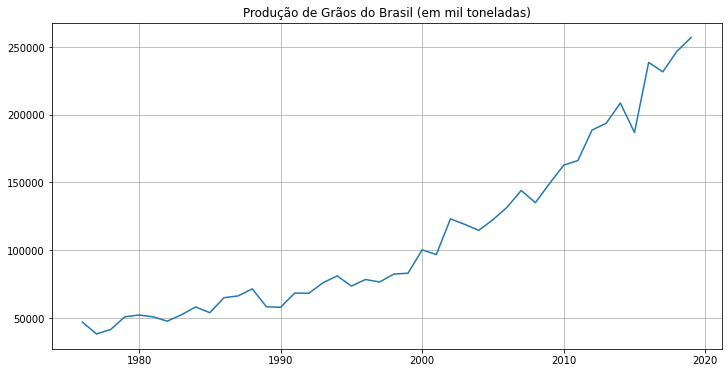

In [ ]:
plt.figure(figsize = [12,6])
plt.title("Produção de Grãos do Brasil (em mil toneladas)")
plt.plot(df_prodT['ANO'], df_prodT['PRODUCAO'])
plt.grid()
plt.show()

###**Área plantada** <a name="annacarea"></a>

Até o ano 2000 o Brasil teve aumentos e quedas na área total utilizada para o plantio de grãos, terminado este período com um crescimento quase nulo de 1,4%; já nos anos seguintes vemos uma extensa expansão da área de cultivo, totalizando 76% de aumento em todo o período analisado, alcançando aproximadamente 66 milhões de hectares. 



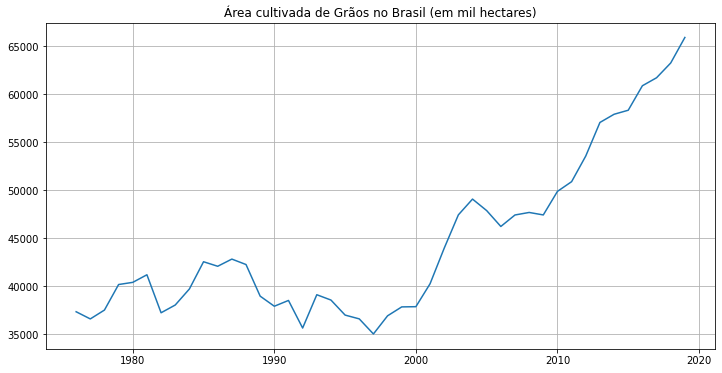

In [ ]:
plt.figure(figsize = [12,6])
plt.title("Área cultivada de Grãos no Brasil (em mil hectares)")
plt.plot(df_prodT['ANO'], df_prodT['AREA'])
plt.grid()
plt.show()

###**Produtividade** <a name="annacprodut"></a>

Ao contrário da área de cultivo, em todo o período notamos um crescente aumento da produtividade com algumas quedas, destacando 2004 e 2015, mas com recuperação nos anos seguintes continuando a tendência, chegando a um aumento de 210% no período. 

Porém vale notar que nos últimos anos (de 2016 a 2019) a produtividade permanece sem crescimento em torno de 3,9 toneladas por hectare.

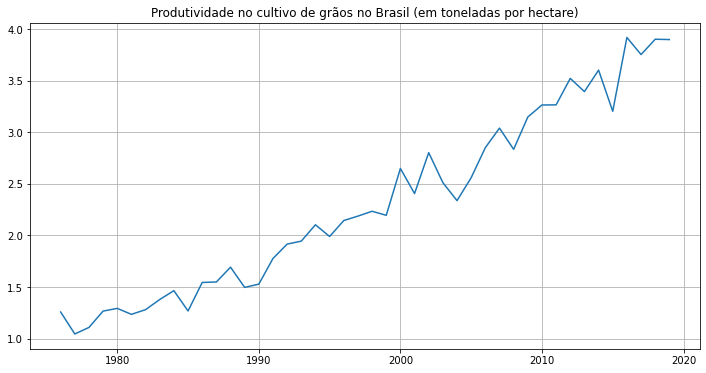

In [ ]:
plt.figure(figsize = [12,6])
plt.title("Produtividade no cultivo de grãos no Brasil (em toneladas por hectare)")
plt.plot(df_prodT['ANO'], df_prodT['PRODUTIVIDADE'])
plt.grid()
plt.show()

###**Comparativo dos Dados** <a name="annaccomp"></a>

Comparando as informações de Produção, Área e Produtividade em uma mesma escala, notamos claramente que o aumento da produtividade foi o responsável pelo aumento da produção do país até 2000, após esse período a produtividade continuou crescendo porém a expansão da área agrícola passa a contribuir de maneira mais efetiva, principalmente nos últimso anos da série onde já notamos que a produtividade se manteve estável.

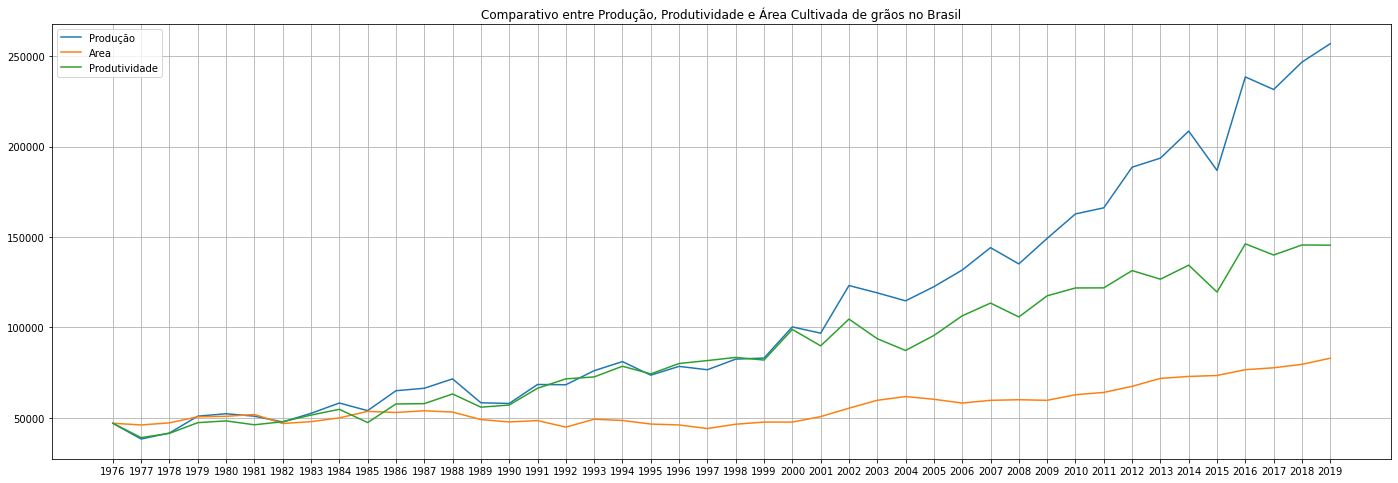

In [ ]:
plt.figure(figsize = [24,8])
plt.title("Comparativo entre Produção, Produtividade e Área Cultivada de grãos no Brasil")
plt.plot(df_prodT['ANO'], df_prodT['PRODUCAO'], label='Produção')
plt.plot(df_prodT['ANO'], df_prodT['AREA_T'], label='Area')
plt.plot(df_prodT['ANO'], df_prodT['PRODUTIVIDADE_T'], label='Produtividade')
plt.xticks(df_prodT['ANO'])
plt.legend()
plt.grid()
plt.show()

###**Financiamento Agrícola** <a name="annacfinan"></a>

Tomando a base histórica de financiamento agroindustrial oriundos do BNDES de 2007 a 2020, observamos que houve um aumento do crédito cedido no periodo (curva em azul), porém se aplicarmos a correção do IPCA acumulado até o fim do período observado, constatamos que não houve um aumento real desde 2014 (curva em laranja).

É passível de suposição que o fato do crédito para o setor estar estagnado pode ter tido influência na também estagnação da produtividade, supondo que com isso não haveria um maior investimento em maquinário e outros que pudessem contribuir com a produtividade.

Porém estes dados de crédito são insuficientes para uma análise mais efetiva, visto que é de um curto período, apenas de origem do BNDES e também relativo a destinação de todo o setor agroindustrial.




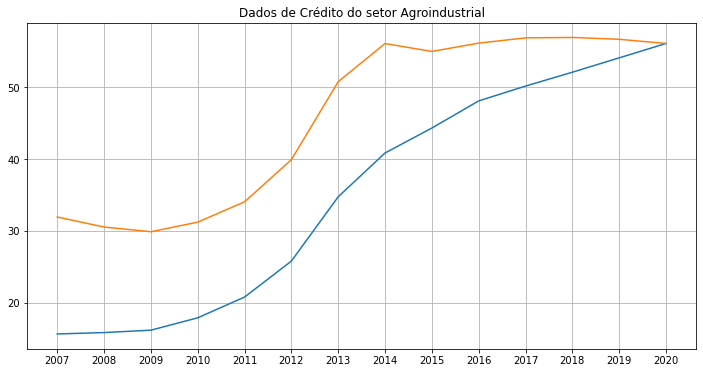

In [ ]:
plt.figure(figsize = [12,6])
plt.title("Dados de Crédito do setor Agroindustrial")
plt.plot(df_finanT['ANO'], df_finanT['SaldoFechamento'])
plt.plot(df_finanT['ANO'], df_finanT['SaldoCorrigido'])
plt.xticks(df_finanT['ANO'])
plt.grid()
plt.show()

##**Por Estado** <a name="anuf"></a>

Os maiores estados na produção de grãos no Brasil são hoje o Mato Grosso, Paraná, Rio Grande do Sul e Goias; os 4 juntos correspondem a 66% da produção nacional, sendo que o maior produtor é o Mato Grosso responsável por 29% da produção.

Até o início dos anos 2000 vemos que PR e RS lideravam o ranking de produção nacional, porém MT veio crescendo de forma constante até superar RS em 2003 e o PR em 2012, mantendo-se como líder e distanciando até hoje.
GO apesar de se equiparar com MT no ínicio da série teve um produção com crescimento mais ameno, apesar de ter superado RS no fim do perído devido a uma forte queda na produção deste último.

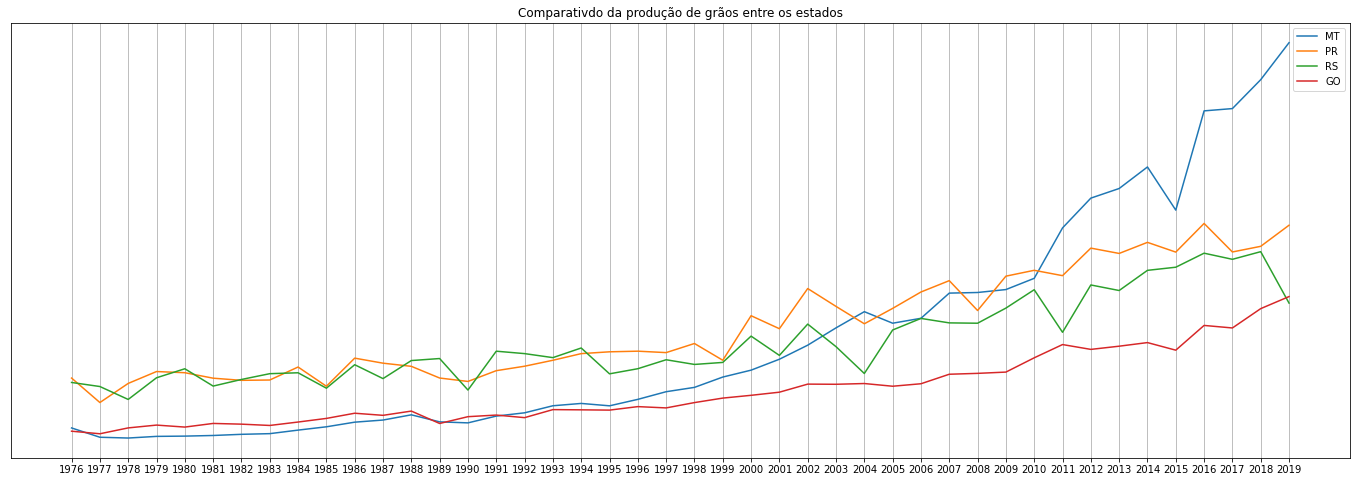

In [ ]:
plt.figure(figsize = [24,8])
plt.title("Comparativdo da produção de grãos entre os estados")
plt.plot(df_prod['ANO'], df_prod['MT'], label='MT')
plt.plot(df_prod['ANO'], df_prod['PR'], label='PR')
plt.plot(df_prod['ANO'], df_prod['RS'], label='RS')
plt.plot(df_prod['ANO'], df_prod['GO'], label='GO')
plt.xticks(df_prod['ANO'])
plt.legend()
plt.grid()
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

###**MT** <a name="anufmt"></a>
O estado do Mato Grosso contribuiu significativamente para o aumento da produção de grãos no Brasil, a sua produção em 1976 era de pouco mais de 3 mil toneladas e chegou em quase 75 mil toneladas em 2019, este aumento de 72 mil toneladas correspondeu a 33% de todo o aumento na produção nacional. 

Apesar da produtividade ter tido um aumento significativo de quase 220% no período, o grande responsável por este aumento de produção foi a expansão agrícola que teve 669% de aumento no mesmo período, principalmente a partir do ano 2000. 

Quando se analisa a produção nacional nota-se uma queda significativa em 2015, 
esta queda é explicada na análise da produção do MT no mesmo período, onde houve uma queda de 15% na produção se comparada ao ano anterior, mostrando o quão impactante é uma variação da produção deste estado. Esta queda na produção em MT se deu por uma menor oferta de chuvas no período, que foi de 24% menor do que do ano anterior e de 11% menor considerando a média histórica de chuvas. 

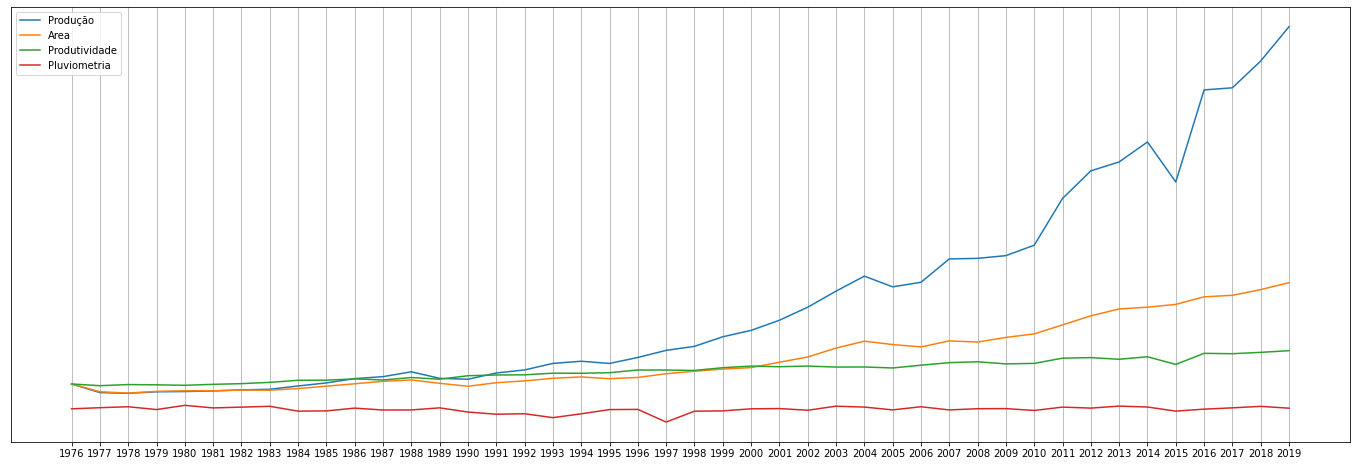

In [ ]:
plt.figure(figsize = [24,8])
plt.plot(df_prod_MT['ANO'], df_prod_MT['PRODUCAO'], label='Produção')
plt.plot(df_prod_MT['ANO'], df_prod_MT['AREA_T'], label='Area')
plt.plot(df_prod_MT['ANO'], df_prod_MT['PRODUTIVIDADE_T'], label='Produtividade')
plt.plot(df_prod_MT['ANO'], df_prod_MT['PLUVI_T'], label='Pluviometria')
plt.xticks(df_prod_MT['ANO'])
plt.legend()
plt.grid()
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

###**PR** <a name="anufpr"></a>
O Paraná, desde o ínicio do período analisado, foi um grande produtor de grãos e teve também um papel importante no aumento da produção nacional, o crescimento no período foi de 230%.

A área plantada não teve um grande aumento, ficando apenas em 30%, e o aumento da produção se deve principalmente ao aumento da produtividade de 153%.

Nota-se que a produtividade tem uma variação significativa a cada ano, uma possível explicação seria um regime de chuvas irregular, sendo necessário um estudo separado de cada cultura e do seu ciclo de chuvas para confirmação. 


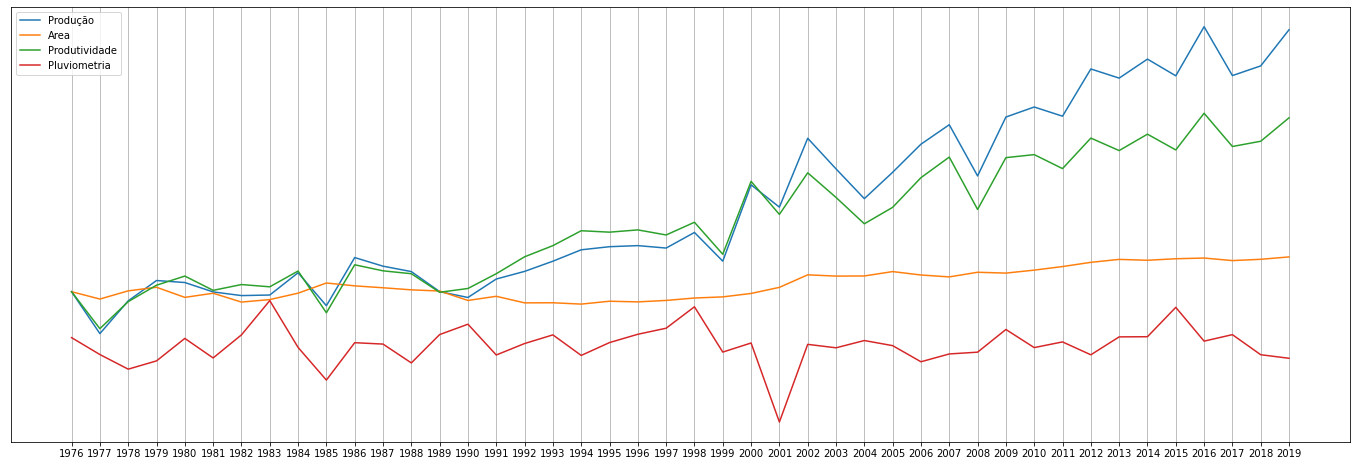

In [ ]:
plt.figure(figsize = [24,8])
plt.plot(df_prod_PR['ANO'], df_prod_PR['PRODUCAO'], label='Produção')
plt.plot(df_prod_PR['ANO'], df_prod_PR['AREA_T'], label='Area')
plt.plot(df_prod_PR['ANO'], df_prod_PR['PRODUTIVIDADE_T'], label='Produtividade')
plt.plot(df_prod_PR['ANO'], df_prod_PR['PLUVI_T'], label='Pluviometria')
plt.legend()
plt.xticks(df_prod_PR['ANO'])
plt.grid()
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

###**GO** <a name="anufgo"></a>
O estado de Goiás nunca esteve no protagonismo da produção nacional porém sempre esteve em uma posição de destaque; em 1976 a sua produção era de cerca 2,4 mil toneladas e obteve a marca de 27,5 mil toneladas em 2019, um aumento de mais de 1000%.

Tanto o aumento da área de cultivo quanto a produtividade foram bem consistentes em todo o periodo, sendo respectivamente de 200% e 276%.

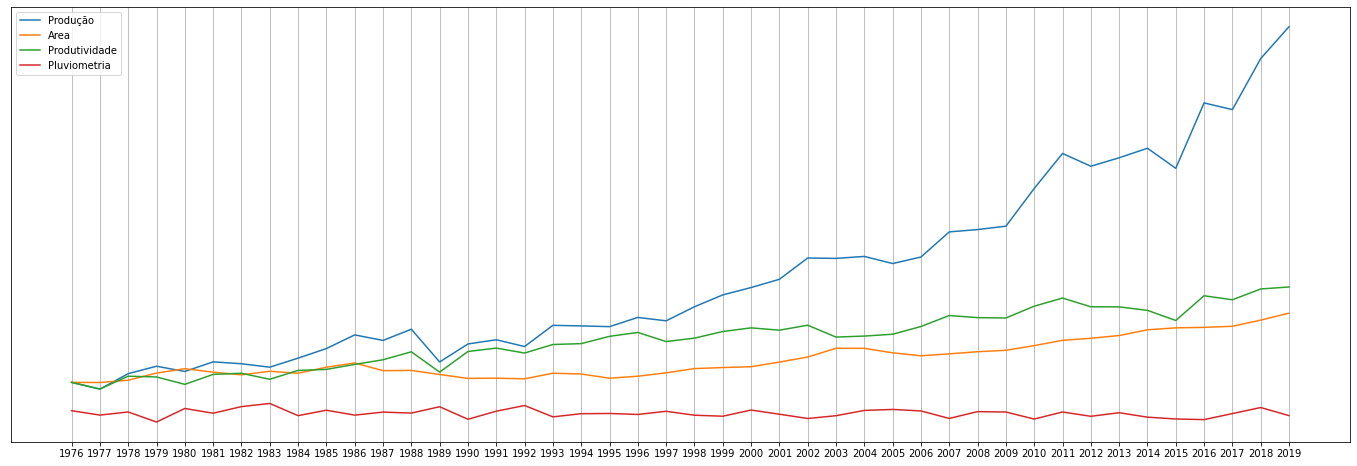

In [ ]:
plt.figure(figsize = [24,8])
plt.plot(df_prod_GO['ANO'], df_prod_GO['PRODUCAO'], label='Produção')
plt.plot(df_prod_GO['ANO'], df_prod_GO['AREA_T'], label='Area')
plt.plot(df_prod_GO['ANO'], df_prod_GO['PRODUTIVIDADE_T'], label='Produtividade')
plt.plot(df_prod_GO['ANO'], df_prod_GO['PLUVI_T'], label='Pluviometria')
plt.legend()
plt.xticks(df_prod_GO['ANO'])
plt.grid()
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

###**RS** <a name="anufrs"></a>
Assim como o Paraná, a produção do Rio Grande do Sul sempre esteve em destaque na produção nacional, ocupando o 1º lugar no início da década de 90, porém perdendo a posição para o PR e posteriormente também sendo superado pelo MT.

O aumento de produção no período foi de 128%, que não se mostra muito expressivo comparando com os outros principais estados.

Ese aumento de produção se deu pelo aumento de 18% na área cultivada e de 93% na produtividade.

No último ano da série, 2019, o estado sofreu uma significativa queda na produção, chegando ao menor nível desde 2011, o que lhe custou a perda da 3ª posição para GO. 

Assim como o estado do PR ele possui também uma irregularidade na produção, que reforçaria a suspeita de um regime irregular de chuva na região.

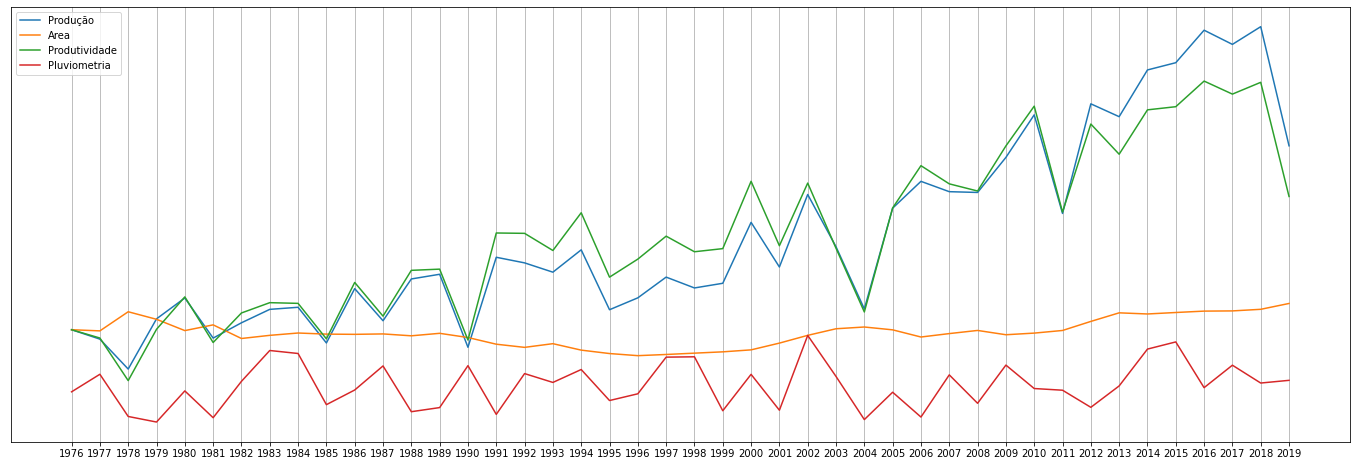

In [ ]:
plt.figure(figsize = [24,8])
plt.plot(df_prod_RS['ANO'], df_prod_RS['PRODUCAO'], label='Produção')
plt.plot(df_prod_RS['ANO'], df_prod_RS['AREA_T'], label='Area')
plt.plot(df_prod_RS['ANO'], df_prod_RS['PRODUTIVIDADE_T'], label='Produtividade')
plt.plot(df_prod_RS['ANO'], df_prod_RS['PLUVI_T'], label='Pluviometria')
plt.legend()
plt.xticks(df_prod_RS['ANO'])
plt.grid()
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()

#**4 - Conclusão** <a name="conclusao"></a>

O aumento da produção de grãos no Brasil se demonstra forte historicamente porém não ocorreu de maneira uniforme, sempre dependendo do protagnismo de alguma região e do seu crescimento, foi assim até o ano de 2000 com a região sul, que parece chegar em um momento de saturação, e desde então pela expansão agrícola no estado no MT. 

Os especialistas acreditam que ainda há um grande potencial no aumento da produção brasileira, tanto do ponto de vista de melhoria de produtividade quanto por um nova expansão agrícola desta vez protagonizada pelos estados da região Norte, mantendo o destaque do Brasil na produção mundial de alimentos.

#**5 - Fontes** <a name="fontes"></a>

* Grãos - Por Unidades da Federação: CONAB
 ( https://www.conab.gov.br/info-agro/safras/serie-historica-das-safras )

* Dados Pluviométricos: INMET (https://portal.inmet.gov.br/). 
Veja o projeto de ETL dos dados em  https://github.com/angeruzzi/ETL_DadosPluviometricos/blob/main/ETL_DadosPluviometricos.ipynb

* Financiamentos Agrícolas: BACEN - Saldo da carteira de crédito com recursos direcionados - Pessoas físicas - Financiamento agroindustrial com recursos do BNDES.
Conceito: Saldo em final de período das operações de crédito regulamentadas pelo Conselho Monetário Nacional (CMN) ou vinculados a recursos orçamentários. Refere-se aos financiamentos com destinação específica, vinculados à comprovação da aplicação dos recursos voltados para a produção e investimento de médio e longo prazos, tendo como fonte de recursos parte das captações de depósitos à vista e de caderneta de poupança, e fundos e programas públicos.
https://www3.bcb.gov.br/sgspub/consultarvalores/consultarValoresSeries.do?method=consultarGraficoPorId&hdOidSeriesSelecionadas=20615

* Dados IPCA: BACEN - Calculadora do Cidadão (https://www3.bcb.gov.br/CALCIDADAO/publico/exibirFormCorrecaoValores.do?method=exibirFormCorrecaoValores&aba=1)

* Outros: 
  * https://www.embrapa.br/busca-de-noticias/-/noticia/62619259/brasil-e-o-quarto-maior-produtor-de-graos-e-o-maior-exportador-de-carne-bovina-do-mundo-diz-estudo

  * https://agenciabrasil.ebc.com.br/economia/noticia/2015-10/areas-do-norte-e-do-nordeste-se-consolidam-como-nova-fronteira-agricola